## Performing t-tests
#### Hypothesis testing workflow
You've seen the hypothesis testing workflow for the one sample case where you compared a sample mean to a hypothesized value, and the two sample case where you compared two sample means. In both cases, the workflow shares common steps.

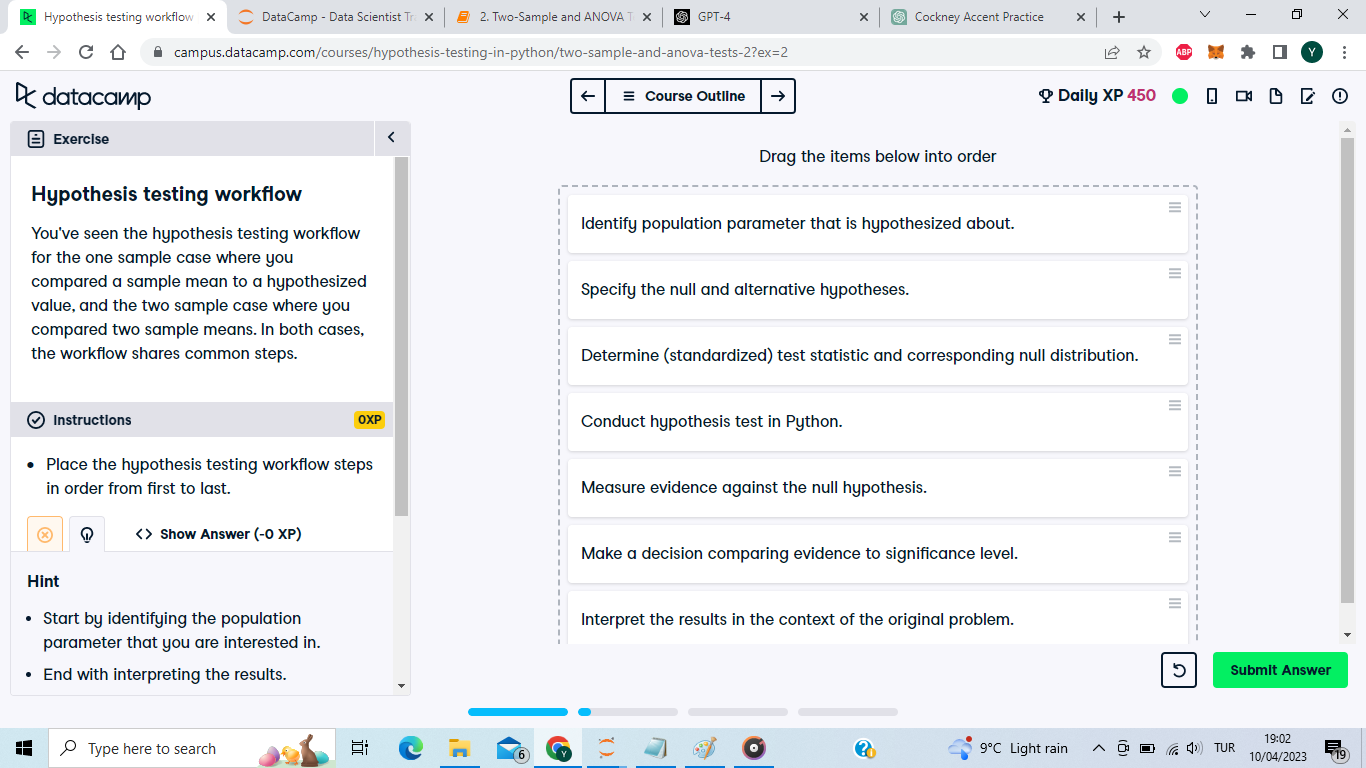

Wild workflow! Regardless of the type of hypothesis test you are performing, it will have a workflow that follows this format.

#### Two sample mean test statistic
The hypothesis test for determining if there is a difference between the means of two populations uses a different type of test statistic to the z-scores you saw in Chapter 1. It's called "t", and it can be calculated from three values from each sample using this equation.

$ t = \dfrac{(\bar{x}_{\text{child}} - \bar{x}_{\text{adult}})}{\sqrt{\dfrac{s_{\text{child}}^2}{n_{\text{child}}} + \dfrac{s_{\text{adult}}^2}{n_{\text{adult}}}}}$
 
 

While trying to determine why some shipments are late, you may wonder if the weight of the shipments that were on time is less than the weight of the shipments that were late. The late_shipments dataset has been split into a "yes" group, where late == "Yes" and a "no" group where late == "No". The weight of the shipment is given in the weight_kilograms variable.

The sample means for the two groups are available as xbar_no and xbar_yes. The sample standard deviations are s_no and s_yes. The sample sizes are n_no and n_yes. numpy is also loaded as np.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

late_shipments = pd.read_feather("late_shipments.feather")

late_shipments

,id,country,managed_by,fulfill_via,vendor_inco_term,shipment_mode,late_delivery,late,product_group,sub_classification,...,line_item_quantity,line_item_value,pack_price,unit_price,manufacturing_site,first_line_designation,weight_kilograms,freight_cost_usd,freight_cost_groups,line_item_insurance_usd
0,36203.0,Nigeria,PMO - US,Direct Drop,EXW,Air,1.0,Yes,HRDT,HIV test,...,2996.0,266644.00,89.00,0.89,"Alere Medical Co., Ltd.",Yes,1426.0,33279.83,expensive,373.83
1,30998.0,Botswana,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test,...,25.0,800.00,32.00,1.60,"Trinity Biotech, Plc",Yes,10.0,559.89,reasonable,1.72
2,69871.0,Vietnam,PMO - US,Direct Drop,EXW,Air,0.0,No,ARV,Adult,...,22925.0,110040.00,4.80,0.08,Hetero Unit III Hyderabad IN,Yes,3723.0,19056.13,expensive,181.57
3,17648.0,South Africa,PMO - US,Direct Drop,DDP,Ocean,0.0,No,ARV,Adult,...,152535.0,361507.95,2.37,0.04,"Aurobindo Unit III, India",Yes,7698.0,11372.23,expensive,779.41
4,5647.0,Uganda,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test - Ancillary,...,850.0,8.50,0.01,0.00,Inverness Japan,Yes,56.0,360.00,reasonable,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,13608.0,Uganda,PMO - US,Direct Drop,DDP,Air,0.0,No,ARV,Adult,...,121.0,9075.00,75.00,0.62,"Janssen-Cilag, Latina, IT",Yes,43.0,199.00,reasonable,12.72
996,80394.0,"Congo, DRC",PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test,...,292.0,9344.00,32.00,1.60,"Trinity Biotech, Plc",Yes,99.0,2162.55,reasonable,13.10
997,61675.0,Zambia,PMO - US,Direct Drop,EXW,Air,1.0,Yes,HRDT,HIV test,...,2127.0,170160.00,80.00,0.80,"Alere Medical Co., Ltd.",Yes,881.0,14019.38,expensive,210.49
998,39182.0,South Africa,PMO - US,Direct Drop,DDP,Ocean,0.0,No,ARV,Adult,...,191011.0,861459.61,4.51,0.15,"Aurobindo Unit III, India",Yes,16234.0,14439.17,expensive,1421.41


In [9]:
xbar_no = late_shipments[late_shipments["late_delivery"] == 0]["weight_kilograms"].mean()
xbar_yes = late_shipments[late_shipments["late_delivery"] == 1]["weight_kilograms"].mean()
s_no = late_shipments[late_shipments["late_delivery"] == 0]["weight_kilograms"].std()
s_yes = late_shipments[late_shipments["late_delivery"] == 1]["weight_kilograms"].std() 
n_no = late_shipments[late_shipments["late_delivery"] == 0]["weight_kilograms"].count()
n_yes = late_shipments[late_shipments["late_delivery"] == 1]["weight_kilograms"].count()

# Calculate the numerator of the test statistic
numerator = xbar_no - xbar_yes

# Calculate the denominator of the test statistic
denominator = np.sqrt(s_no**2/n_no + s_yes**2/n_yes)

# Calculate the test statistic
t_stat = numerator / denominator

# Print the test statistic
print(t_stat)


-2.3936661778766433


t-rrific! When testing for differences between means, the test statistic is called 't' rather than 'z', and can be calculated using six numbers from the samples. Here, the value is about -2.39 or 2.39, depending on the order you calculated the numerator.

#### Why is t needed?

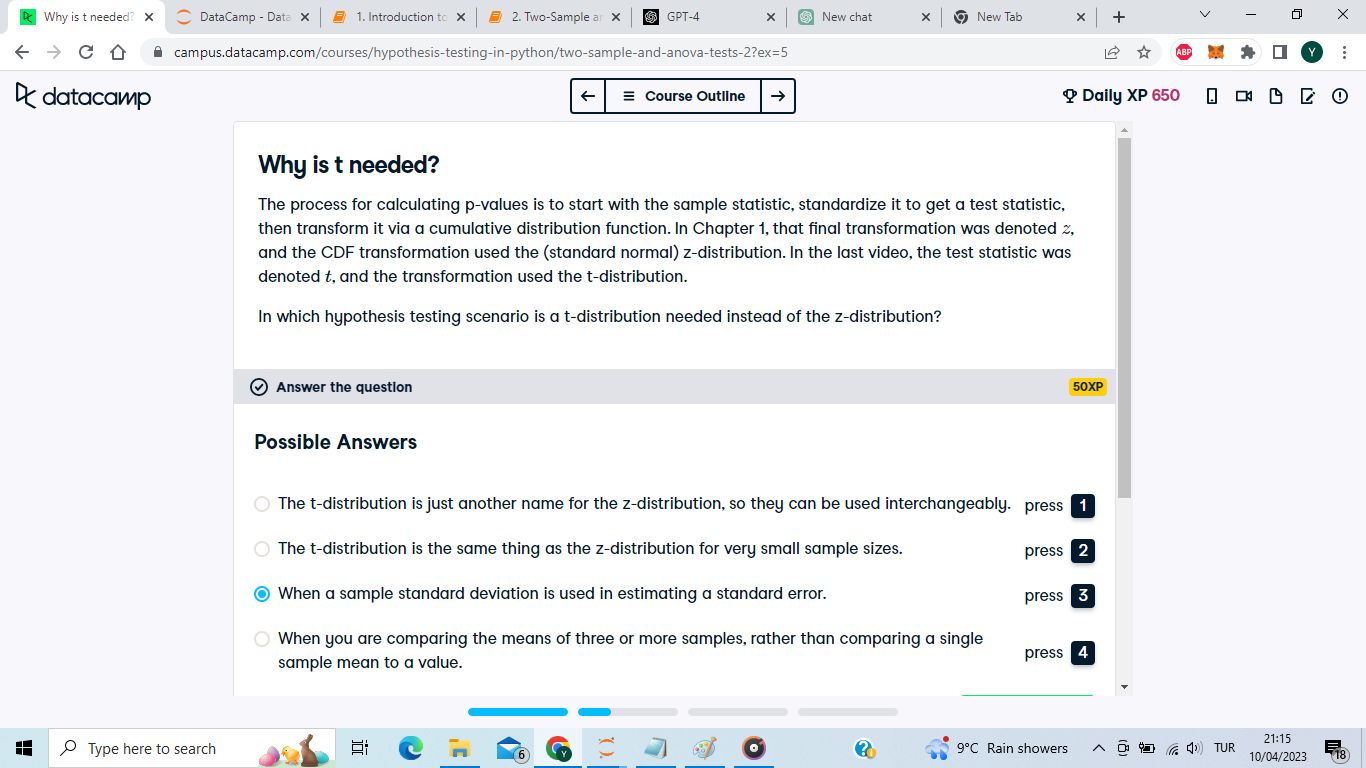

Terrific t! Using a sample standard deviation to estimate the standard error is computationally easier than using bootstrapping. However, to correct for the approximation, you need to use a t-distribution when transforming the test statistic to get the p-value.

#### The t-distribution
The t-distribution is used to calculate the p-value from the 
 test statistic, and having a sense of how the PDF and CDF look can help you understand this calculation. It has two parameters: the degrees of freedom, and the non-centrality parameter.

The plots show the PDF and CDF for a t-distribution (solid black line), and for comparison show a standard normal distribution with mean 0 and variance 1 (gray dotted line).

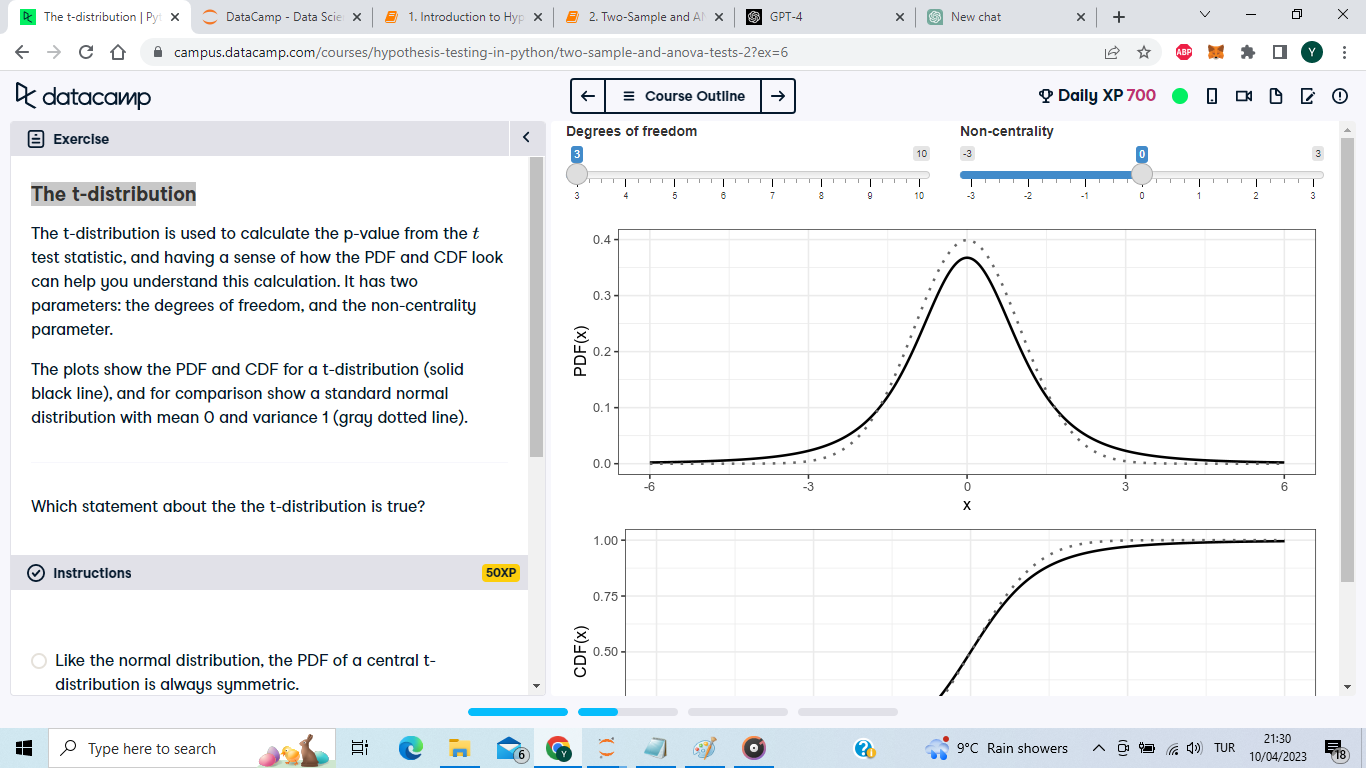

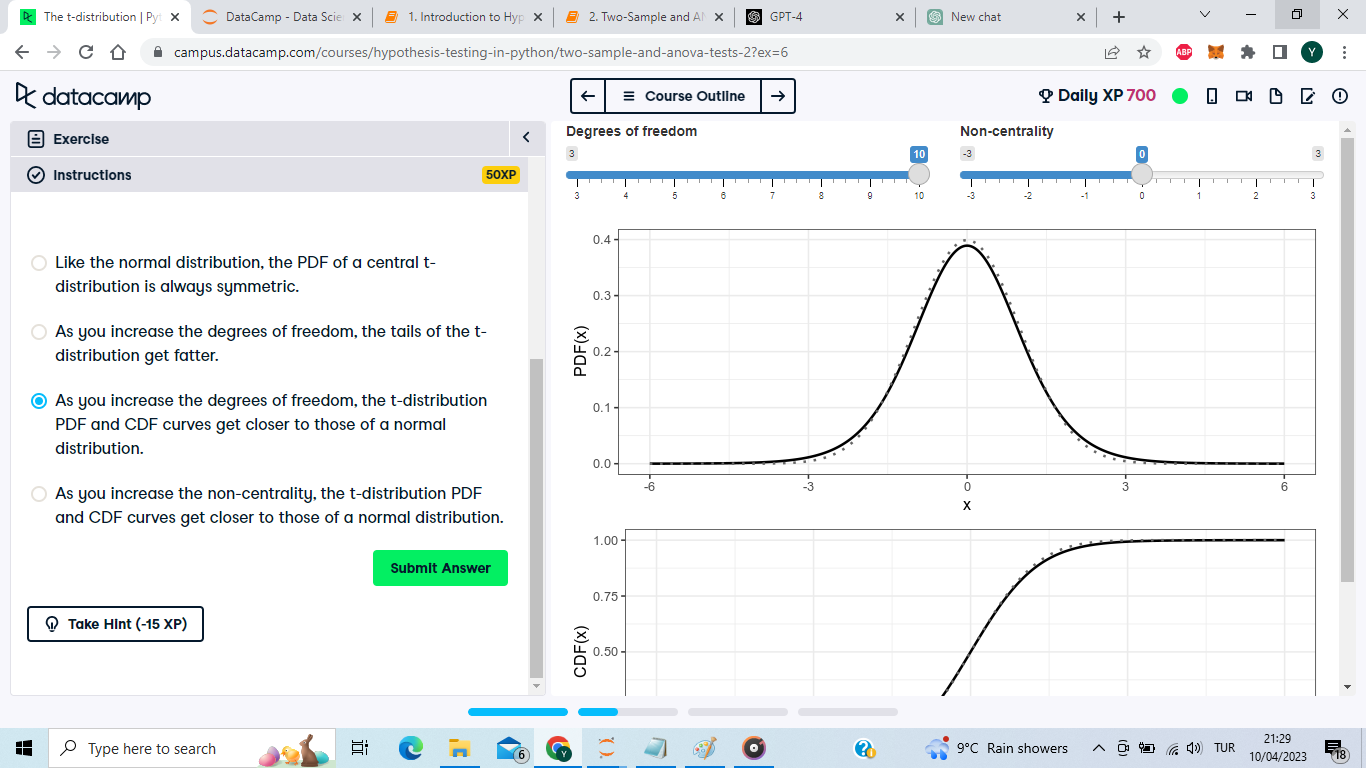

Tip-top t! The normal distribution is essentially a t-distribution with infinite degrees of freedom.

#### From t to p
Previously, you calculated the test statistic for the two-sample problem of whether the mean weight of shipments is smaller for shipments that weren't late (late == "No") compared to shipments that were late (late == "Yes"). In order to make decisions about it, you need to transform the test statistic with a cumulative distribution function to get a p-value.

Recall the hypotheses:

$H_0$: The mean weight of shipments that weren't late is the same as the mean weight of shipments that were late.

$H_A$: The mean weight of shipments that weren't late is less than the mean weight of shipments that were late.

The test statistic, t_stat, is available, as are the samples sizes for each group, n_no and n_yes. Use a significance level of alpha = 0.05.

t has also been imported from scipy.stats.

#### Question
What type of test does the alternative hypothesis indicate that we need?

a.Two-tailed<br>
<strong>b.Left-tailed</strong><br>
c.Right-tailed

In [10]:
from scipy.stats import t

#Significance level is alpha
alpha = 0.05 

# Calculate the degrees of freedom
degrees_of_freedom = n_no + n_yes - 2

# Calculate the p-value from the test stat
p_value = t.cdf(t_stat, df=degrees_of_freedom)

# Print the p_value
print(p_value)

0.008432382146249525


#### Question
What decision should you make based on the results of the hypothesis test?<br>
<br>
a.Fail to reject the null hypothesis.<br>
<strong>b.Reject the null hypothesis.</strong><br>
c.You can't conclude anything from this hypothesis test.

Yeah! Since p<=a, reject the null hypothesis. Perspicacious p-value predictions! When the standard error is estimated from the sample standard deviation and sample size, the test statistic is transformed into a p-value using the t-distribution.

## Paired t-tests

#### Is pairing needed?

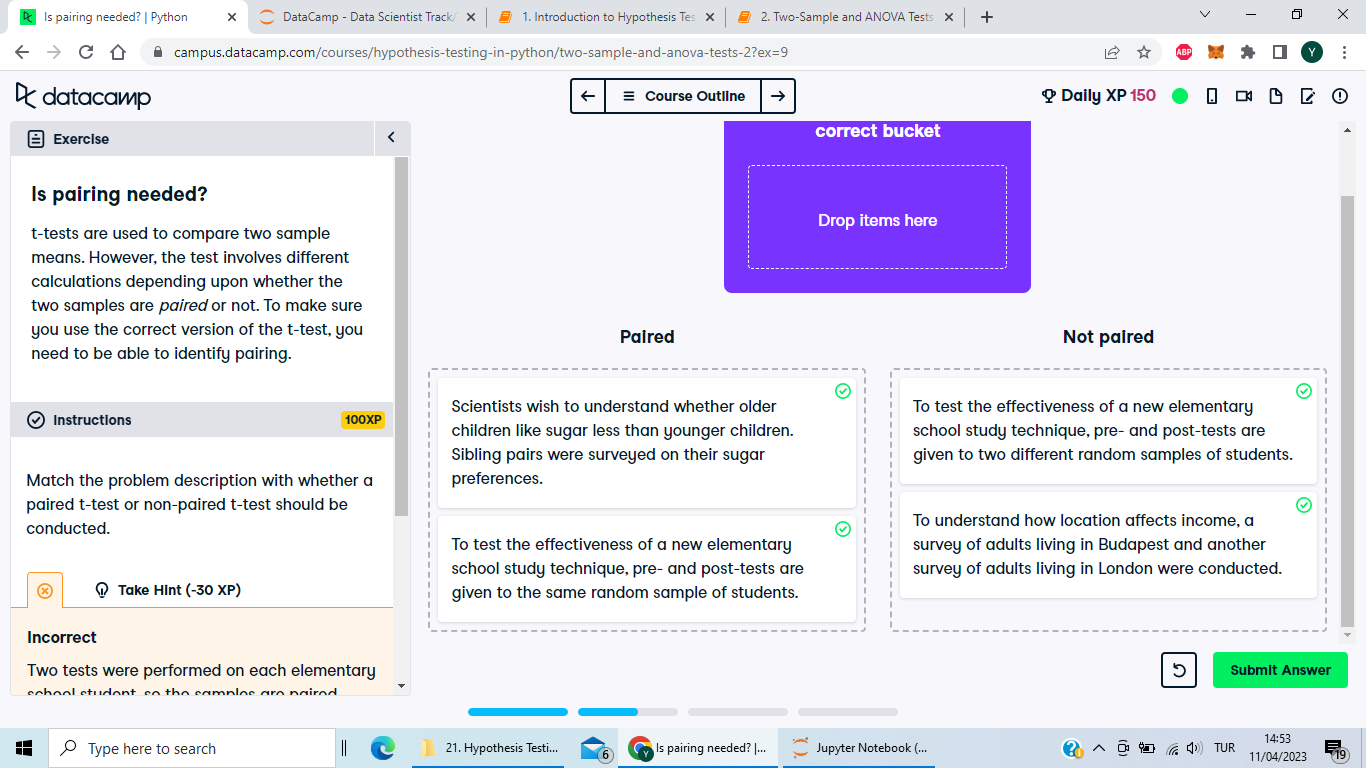

Daring pairing! If you have repeated observations of something, then those observations form pairs.

#### Visualizing the difference
Before you start running hypothesis tests, it's a great idea to perform some exploratory data analysis; that is, calculating summary statistics and visualizing distributions.

Here, you'll look at the proportion of county-level votes for the Democratic candidate in 2012 and 2016, sample_dem_data. Since the counties are the same in both years, these samples are paired. The columns containing the samples are dem_percent_12 and dem_percent_16.

dem_votes_potus_12_16 is available as sample_dem_data. pandas and matplotlib.pyplot are loaded with their usual aliases.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import t

sample_dem_data = pd.read_feather("dem_votes_potus_12_16.feather")
sample_dem_data


,state,county,dem_percent_12,dem_percent_16
0,Alabama,Bullock,76.305900,74.946921
1,Alabama,Chilton,19.453671,15.847352
2,Alabama,Clay,26.673672,18.674517
3,Alabama,Cullman,14.661752,10.028252
4,Alabama,Escambia,36.915731,31.020546
...,...,...,...,...
495,Wyoming,Uinta,19.065464,14.191263
496,Wyoming,Washakie,20.131846,13.948610
497,Alaska,District 3,33.514582,16.301064
498,Alaska,District 18,61.284271,52.810051


In [12]:
# Calculate the differences from 2012 to 2016
sample_dem_data['diff'] = sample_dem_data.dem_percent_12 - sample_dem_data.dem_percent_16

# Print sample_dem_data
print(sample_dem_data)

       state       county  dem_percent_12  dem_percent_16       diff
0    Alabama      Bullock       76.305900       74.946921   1.358979
1    Alabama      Chilton       19.453671       15.847352   3.606319
2    Alabama         Clay       26.673672       18.674517   7.999155
3    Alabama      Cullman       14.661752       10.028252   4.633500
4    Alabama     Escambia       36.915731       31.020546   5.895185
..       ...          ...             ...             ...        ...
495  Wyoming        Uinta       19.065464       14.191263   4.874201
496  Wyoming     Washakie       20.131846       13.948610   6.183235
497   Alaska   District 3       33.514582       16.301064  17.213518
498   Alaska  District 18       61.284271       52.810051   8.474220
499   Alaska  District 24       42.913980       39.405286   3.508694

[500 rows x 5 columns]


6.829312660106834
5.040139140132316


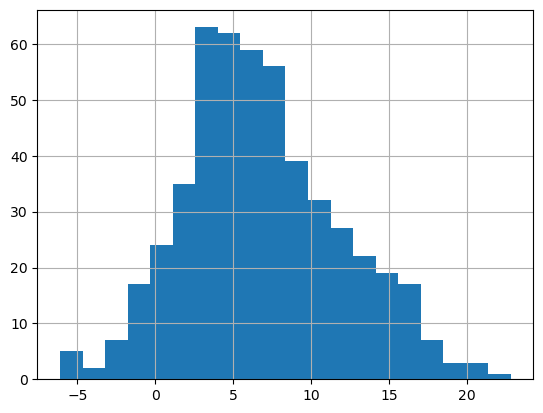

In [13]:
# Find the mean of the diff column
xbar_diff = sample_dem_data['diff'].mean()

# Print xbar_diff
print(xbar_diff)

# Find the standard deviation of the diff column
s_diff = sample_dem_data['diff'].std()

# Print s_diff
print(s_diff)

# Plot a histogram of diff with 20 bins
sample_dem_data['diff'].hist(bins = 20) # or plt.hist(sample_dem_data['diff'], bins = 20)
plt.show()

Delightful difference discovery! Notice that the majority of the histogram lies to the right of zero.

#### Using ttest()
Manually calculating test statistics and transforming them with a CDF to get a p-value is a lot of effort to compare two sample means. The comparison of two sample means is called a t-test, and the pingouin Python package has a .ttest() method to accomplish it. This method provides some flexibility in how you perform the test.

As in the previous exercise, you'll explore the difference between the proportion of county-level votes for the Democratic candidate in 2012 and 2016 to identify if the difference is significant. The hypotheses are as follows:

$H_0$: The proportion of democratic votes in 2012 and 2016 were the same.<br> 
$H_A$: The proportion of democratic votes in 2012 and 2016 were different.<br>

sample_dem_data is available and has the columns diff, dem_percent_12, and dem_percent_16 in addition to the state and county names. pingouin and has been loaded along with pandas as pd

In [14]:
import pingouin

# Conduct a t-test on diff
test_results = pingouin.ttest(x = sample_dem_data['diff'],y = 0,alternative = 'two-sided')
                              
# Print the test results
print(test_results)

                T  dof alternative          p-val         CI95%   cohen-d  \
T-test  30.298384  499   two-sided  3.600634e-115  [6.39, 7.27]  1.354985   

              BF10  power  
T-test  2.246e+111    1.0  


#### Question
What's the correct decision from the t-test, assuming $a$ = $0.01$ 
?

a.Fail to reject the null hypothesis.<br>
<strong>b.Reject the null hypothesis.</strong><br>
c.You can't conclude anything from this hypothesis test.

In [15]:
# Conduct a paired t-test on dem_percent_12 and dem_percent_16
paired_test_results = pingouin.ttest(x = sample_dem_data['dem_percent_12'],
                                     y = sample_dem_data['dem_percent_16'],
                                     paired = True,
                                     alternative = 'two-sided')
                              
# Print the paired test results
print(paired_test_results)

                T  dof alternative          p-val         CI95%   cohen-d  \
T-test  30.298384  499   two-sided  3.600634e-115  [6.39, 7.27]  0.454202   

              BF10  power  
T-test  2.246e+111    1.0  


#### Question
Compare the paired t-test to an (inappropriate) unpaired test on the same data. How does the p-value change?<br>
<br>
pingouin.ttest(x=sample_dem_data['dem_percent_12'], <br>
               y=sample_dem_data['dem_percent_16'],<br> 
               alternative="two-sided")<br>
<br>
a.The p-value from the unpaired test is smaller than the p-value from the paired test.<br>
b.The p-value from the unpaired test is equal to the p-value from the paired test.<br>
<strong>c.The p-value from the unpaired test is greater than the p-value from the paired test.</strong>

In [16]:
unpaired_test_result = pingouin.ttest(x=sample_dem_data['dem_percent_12'],
y=sample_dem_data['dem_percent_16'],
alternative="two-sided")

print(unpaired_test_result)

               T  dof alternative         p-val        CI95%   cohen-d  \
T-test  7.181565  998   two-sided  1.345737e-12  [4.96, 8.7]  0.454202   

             BF10  power  
T-test  4.308e+09    1.0  


Paired t-test party! Using .ttest() lets you avoid manual calculation to run your test. When you have paired data, a paired t-test is preferable to the unpaired version because it reduces the chance of a false negative error.

## ANOVA tests
#### Visualizing many categories
So far in this chapter, we've only considered the case of differences in a numeric variable between two categories. Of course, many datasets contain more categories. Before you get to conducting tests on many categories, it's often helpful to perform exploratory data analysis (EDA), calculating summary statistics for each group and visualizing the distributions of the numeric variable for each category using box plots.

Here, we'll return to the late shipments data, and how the price of each package (pack_price) varies between the three shipment modes (shipment_mode): "Air", "Air Charter", and "Ocean".

late_shipments is available; pandas and matplotlib.pyplot are loaded with their standard aliases, and seaborn is loaded as sns.

In [17]:
import seaborn as sns
# Calculate the mean pack_price for each shipment_mode
xbar_pack_by_mode = late_shipments.groupby('shipment_mode')['pack_price'].mean()

# Print the grouped means
print(xbar_pack_by_mode)

shipment_mode
Air            39.712395
Air Charter     4.226667
Ocean           6.432273
Name: pack_price, dtype: float64


In [18]:
# Calculate the standard deviation of the pack_price for each shipment_mode
s_pack_by_mode =  late_shipments.groupby("shipment_mode")['pack_price'].std()

# Print the grouped standard deviations
print(s_pack_by_mode)

shipment_mode
Air            48.932861
Air Charter     0.992969
Ocean           5.303047
Name: pack_price, dtype: float64


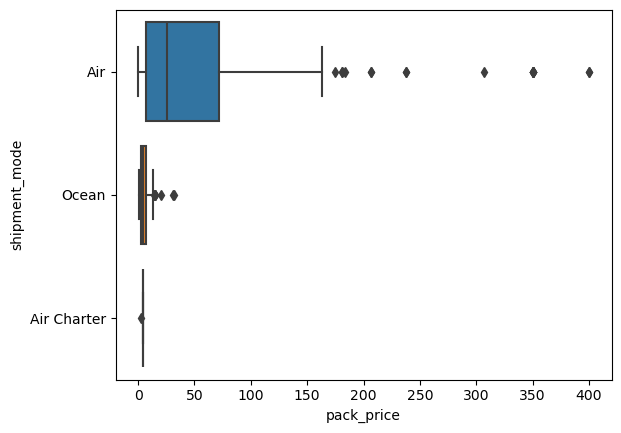

In [19]:
# Boxplot of shipment_mode vs. pack_price
sns.boxplot(x = 'pack_price', y = 'shipment_mode', data = late_shipments)
plt.show()

Beautiful boxplotting! There certainly looks to be a difference in the pack price between each of the three shipment modes. Do you think the differences are statistically significant?

#### Conducting an ANOVA test
The box plots made it look like the distribution of pack price was different for each of the three shipment modes. However, it didn't tell us whether the mean pack price was different in each category. To determine that, we can use an ANOVA test. The null and alternative hypotheses can be written as follows.

$H_0$: Pack prices for every category of shipment mode are the same.

$H_A$: Pack prices for some categories of shipment mode are different.

Use a significance level of 0.1.

late_shipments is available and pingouin has been loaded.

In [20]:
# Run an ANOVA for pack_price across shipment_mode
anova_results = pingouin.anova(data=late_shipments,
                               dv='pack_price',
                               between = "shipment_mode")

# Print anova_results
print(anova_results)

          Source  ddof1  ddof2        F         p-unc       np2
0  shipment_mode      2    997  21.8646  5.089479e-10  0.042018


#### Question
Assuming a significance level of 0.1, should you reject the null hypothesis that there is no difference in pack prices between shipment modes?<br>
<br>
a.Yes. The p-value is greater than or equal to the significance level, so the null hypothesis should be rejected.<br>
<strong>b.Yes. The p-value is less than or equal to the significance level, so the null hypothesis should be rejected.</strong><br>
c.No. The p-value is greater than or equal to the significance level, so the null hypothesis should fail to be rejected.<br>
d.No. The p-value is less than or equal to the significance level, so the null hypothesis should fail to be rejected.

Amazing ANOVA! There is a significant difference in pack prices between the shipment modes. However, we don't know which shipment modes this applies to.

#### Pairwise t-tests
The ANOVA test didn't tell you which categories of shipment mode had significant differences in pack prices. To pinpoint which categories had differences, you could instead use pairwise t-tests.

late_shipments is available and pingouin has been loaded.

In [21]:
# Modify the pairwise t-tests to use Bonferroni p-value adjustment
pairwise_results = pingouin.pairwise_tests(data=late_shipments, 
                                           dv="pack_price",
                                           between="shipment_mode",
                                           padjust="none")

# Print pairwise_results
print(pairwise_results)

        Contrast            A            B  Paired  Parametric          T  \
0  shipment_mode          Air  Air Charter   False        True  21.179625   
1  shipment_mode          Air        Ocean   False        True  19.335760   
2  shipment_mode  Air Charter        Ocean   False        True  -3.170654   

          dof alternative         p-unc       BF10    hedges  
0  600.685682   two-sided  8.748346e-75  5.809e+76  0.726592  
1  986.979785   two-sided  6.934555e-71  1.129e+67  0.711119  
2   35.615026   two-sided  3.123012e-03     15.277 -0.423775  


In [22]:
# Modify the pairwise t-tests to use Bonferroni p-value adjustment
pairwise_results = pingouin.pairwise_tests(data=late_shipments, 
                                           dv="pack_price",
                                           between="shipment_mode",
                                           padjust="bonf")

# Print pairwise_results
print(pairwise_results)

        Contrast            A            B  Paired  Parametric          T  \
0  shipment_mode          Air  Air Charter   False        True  21.179625   
1  shipment_mode          Air        Ocean   False        True  19.335760   
2  shipment_mode  Air Charter        Ocean   False        True  -3.170654   

          dof alternative         p-unc        p-corr p-adjust       BF10  \
0  600.685682   two-sided  8.748346e-75  2.624504e-74     bonf  5.809e+76   
1  986.979785   two-sided  6.934555e-71  2.080367e-70     bonf  1.129e+67   
2   35.615026   two-sided  3.123012e-03  9.369037e-03     bonf     15.277   

     hedges  
0  0.726592  
1  0.711119  
2 -0.423775  


#### Question
Using the Bonferroni correction results and assuming a significance level of 0.1, for which pairs of shipment modes should you reject the null hypothesis that the pack prices are equal?<br>
<br>
<strong>a."Ocean" and "Air Charter"; "Ocean" and "Air"; "Air Charter" and "Air".</strong><br>
b."Ocean" and "Air" and also "Air Charter" and "Air".<br>
c."Ocean" and "Air" only.<br>
d."Ocean" and "Air Charter" only.

Pairwise perfection! After applying the Bonferroni adjustment, the p-values for the t-tests between each of the three groups are all less than 0.1.